In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [3]:
model = LogisticRegression(solver="liblinear", random_state=0)

In [4]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)

In [7]:
model.classes_

array([0, 1])

In [8]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [9]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [11]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [12]:
model.score(x, y)

0.9

In [13]:
confusion_matrix(y, y_pred)

array([[3, 1],
       [0, 6]])

In [14]:
confusion_matrix(y, y_pred)[1, 0]

0

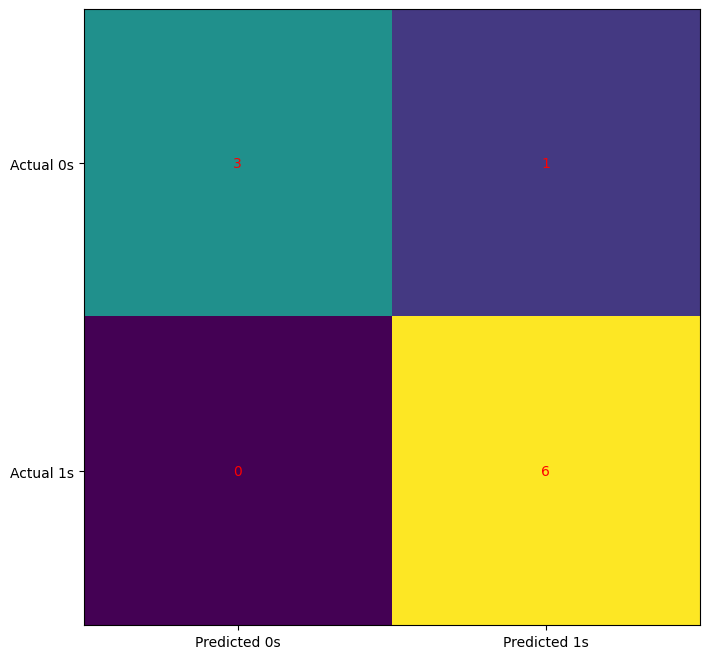

In [15]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

In [16]:
confusion_matrix(y, y_pred)

array([[3, 1],
       [0, 6]])

Precision: prediction
- TN / (TN + FN)
- TP / (TP + FP)

Recall: actual
- FP / (TN + FP)
- TP / (FN + TP)

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



- The positive predictive value is the ratio of the number of true positives to the sum of the numbers of true and false positives.
- The negative predictive value is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
- The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
- The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives.

### Handwriting Recognition

In [18]:
x, y = load_digits(return_X_y=True)

In [19]:
print(x)
print(y)

print(x.shape)
print(y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


9


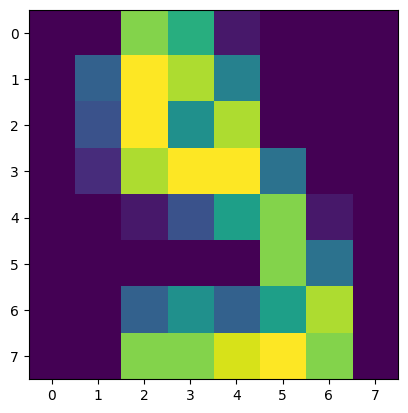

In [20]:
i = 37
plt.imshow(x[i].reshape(8, 8))
print(y[i])

In [21]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- x_train: the part of x used to fit the model
- x_test: the part of x used to evaluate the model
- y_train: the part of y that corresponds to x_train
- y_test: the part of y that corresponds to x_test

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [24]:
model = LogisticRegression(
    solver="liblinear", C=0.05, multi_class="ovr", random_state=0
)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

- train: fit dan transform, fit dan predict
- test: transform only, predict only

In [25]:
x_test = scaler.transform(x_test)

In [26]:
y_pred = model.predict(x_test)

In [27]:
print(model.predict(x_train))
print(y_train)
print(model.predict(x_test)[:5])
print(y_test[:5])

[6 5 3 ... 7 7 8]
[6 5 3 ... 7 7 8]
[2 8 2 6 6]
[2 8 2 6 6]


In [28]:
model.score(x_train, y_train)

0.964509394572025

In [29]:
model.score(x_test, y_test)

0.9416666666666667

In [30]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

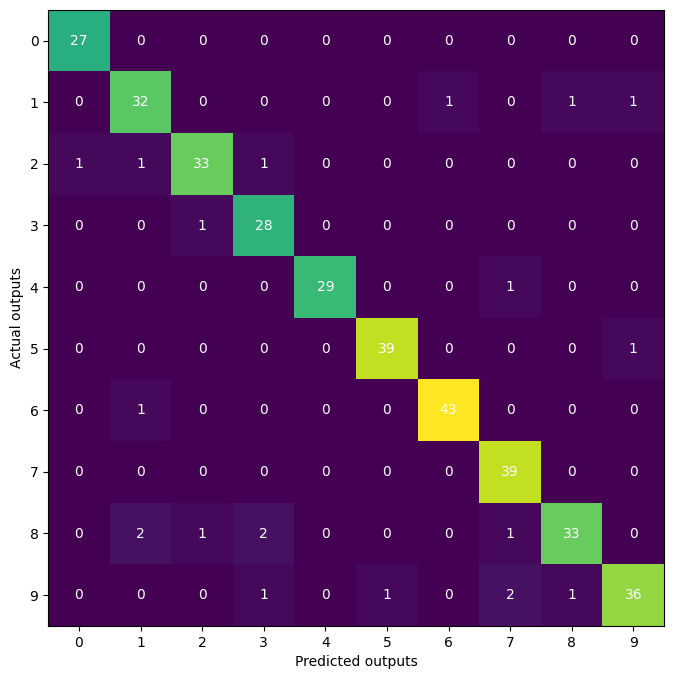

In [31]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")
plt.show()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### KNN

In [34]:
# Assigning features and label variables

# First Feature
weather = [
    "Sunny",
    "Sunny",
    "Overcast",
    "Rainy",
    "Rainy",
    "Rainy",
    "Overcast",
    "Sunny",
    "Sunny",
    "Rainy",
    "Sunny",
    "Overcast",
    "Overcast",
    "Rainy",
]

# Second Feature
temp = [
    "Hot",
    "Hot",
    "Hot",
    "Mild",
    "Cool",
    "Cool",
    "Cool",
    "Mild",
    "Cool",
    "Mild",
    "Mild",
    "Mild",
    "Hot",
    "Mild",
]

# Label or target varible
play = [
    "No",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "No",
    "Yes",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "No",
]

In [35]:
#creating labelEncoder
le = LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [36]:
le.fit_transform(weather)

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [37]:
#ordinal encoder
oe = OrdinalEncoder()
oe.fit_transform(pd.DataFrame(weather)).reshape(-1,)

array([2., 2., 0., 1., 1., 1., 0., 2., 2., 1., 2., 0., 0., 1.])

In [38]:
#onehot encoder
oh = OneHotEncoder()
oh.fit_transform(pd.DataFrame(weather)).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [39]:
temp_encoded = le.fit_transform(temp)

label = le.fit_transform(play)
print(temp_encoded)
print(label)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [40]:
features = list(zip(weather_encoded, temp_encoded))

In [41]:
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [42]:
oe.fit_transform(pd.DataFrame(list(zip(weather, temp))))

array([[2., 1.],
       [2., 1.],
       [0., 1.],
       [1., 2.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [2., 2.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [0., 2.],
       [0., 1.],
       [1., 2.]])

In [43]:
np.unique(weather)

array(['Overcast', 'Rainy', 'Sunny'], dtype='<U8')

In [44]:
np.unique(temp)

array(['Cool', 'Hot', 'Mild'], dtype='<U4')

In [45]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

predicted = model.predict([[0, 2]])

print(predicted)

[1]


ELS

### KNN MULTIPLE LAB

In [46]:
wine = load_wine()

In [48]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [47]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [49]:
pd.DataFrame(wine.data, columns=wine.feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [51]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [52]:
wine.data.shape

(178, 13)

In [53]:
wine.target.shape

(178,)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [56]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7222222222222222


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.77      0.77      0.77        22
           2       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54



In [58]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [59]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7777777777777778


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.81      0.77      0.79        22
           2       0.60      0.69      0.64        13

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.79      0.78      0.78        54



In [61]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

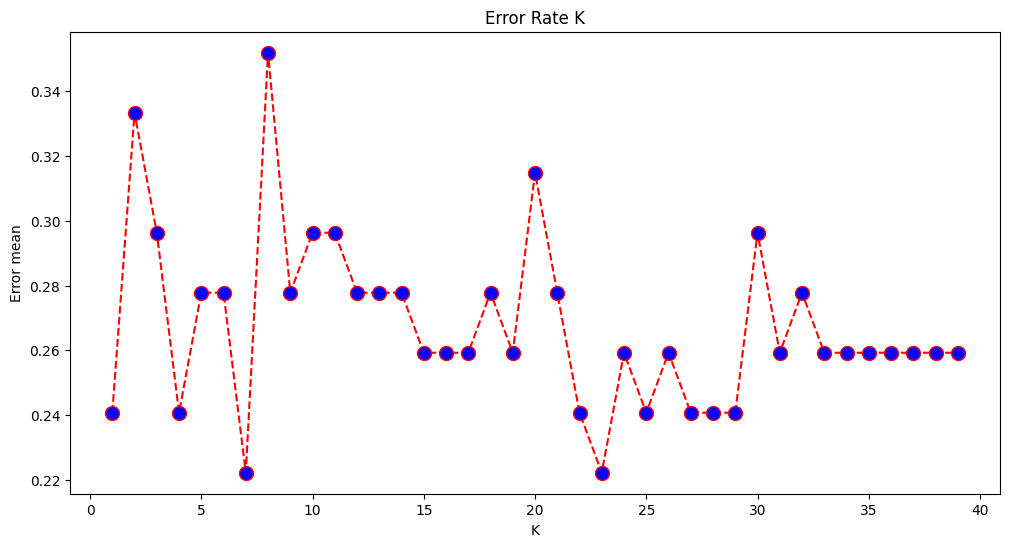

In [62]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [63]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=23)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778
